# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. The dataset is given as .npz file, and will contain data in  numpy array. 

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. You are allowed to use the numpy library to calculate eigen values. All other functions for reconstruction, clustering, etc., should be written from scratch.

12. Change the name of the file with your roll no.



In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 5: Life in Lower Dimensions

You are provided with a dataset of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA, and perform K-means clustering the images in this reduced space.
 




In [2]:
# Cell type : CodeWrite
# write the function for PCA and K-means clustering here. 

def PCA(dataset, m_dim):
    """ Implements PCA on the provided dataset.
    
    Arguments:
        
        dataset - shape n*d
        m_dim - number of principal components
        
    Returns:
    
        Z - The coefficients of the principal components
        b - The coefficients of the non-principal components
        v - the set of orthogonal basis vectors of the target space
    """
    
    # Finding the covariance matrix
    X = dataset.T
    x_bar = np.mean(X, axis = 1)
    S = (1/X.shape[1])*np.matmul(X-x_bar[:, np.newaxis], (X-x_bar[:, np.newaxis]).T)
    
    # Finding eigenvalues and eigenvectors
    
    w, v = np.linalg.eig(S) # w is the array of eigenvalues, and the columns of v are the corresponding eigenvectors
    
    # Transforming the data to a lower dimension space
    
    Z = np.zeros((m_dim, X.shape[1])) # Z contains the coefficients of the Principal Components
    b = np.zeros((m_dim, 1)) # Bias term
    
    for i in range(X.shape[1]):
        Z[:, i] = np.matmul(X[:, i].T, v[:,:m_dim]).T
        
    b = np.matmul(x_bar.T, v[:, m_dim:]).T[:, np.newaxis]
    
    return Z, b, v

def Kmeans(dataset, k):
    """" Implements K-Means Clustering on the provided dataset
    
    Arguments:
    
        dataset - shape n*d
        k - number of clusters
        
    Returns:
    
        mean_vectors - shape d*k
        R - responsibilities - shape n*k
    """   
    X = dataset.T
    R = np.zeros((dataset.shape[0], k)) # Rows of R are the responsibility vectors for each datapoint
    mean_vectors = X[:, :k] # Columns are the mean vectors of each cluster
    
    iterations = 20
    
    for i in range(iterations):
        # Updating the responsibilities
        for l in range(X.shape[1]):
            x = X[:, l]
            distances = np.array([np.linalg.norm(x-mean_vectors[:,f]) for f in range(k)])
            cluster = np.argmin(distances)
            r = np.zeros((1, k))
            r[0, cluster] = 1
            R[l, :] = r
        # Updating the cluster centers    
        for l in range(mean_vectors.shape[1]):
            mean_vectors[:, l] = np.matmul(X, R[:, l])/(np.sum(R[:, l]))
            
    return mean_vectors, R

**Cell type : TextRead**

# Problem 5

#### 5a) Run PCA algorithm on the given data-set. Plot the cumulative percentage variance explained by the principal components. Report the number of principal components that contribute to 90% of the variance in the dataset.




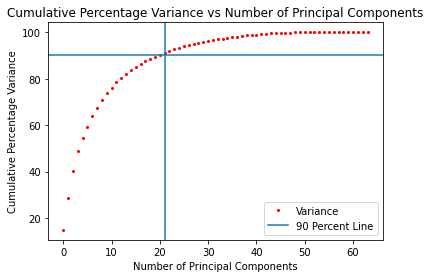

In [3]:
# Cell type : CodeWrite
# write the code for loading the data, running the PCA algorithm, and plotting. 
# (Use the functions written previously.)

dataset = np.load('Data.npz')
dataset = dataset.f.arr_0
X = dataset.T # Columns of X are the data points
x_bar = np.mean(X, axis = 1)
S = (1/X.shape[1])*np.matmul(X-x_bar[:, np.newaxis], (X-x_bar[:, np.newaxis]).T) # Covariance matrix
variance = []
Z, b, v= PCA(dataset, 1) # Running PCA

for i in range(dataset.shape[1]):
    variance.append(np.matmul(v[:, i].T, np.matmul(S, v[:, i]))) # Finding Variance for each component
    
variance = np.array(variance)    
normalized_variance = 100*(variance/np.sum(variance)) # Percent Variance
cum_variance = np.cumsum(normalized_variance) # Percent Cumulative Variance

# Plotting
plt.plot(np.arange(cum_variance.shape[0]), cum_variance, 'ro', markersize = 2)
plt.axhline(90)
plt.axvline(21)
plt.legend(['Variance', '90 Percent Line'])
plt.xlabel(r'Number of Principal Components')
plt.ylabel(r'Cumulative Percentage Variance')
plt.title(r'Cumulative Percentage Variance vs Number of Principal Components')
plt.show()

####5b)  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions [2,4,8,16]. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.



In [4]:
# Cell type : CodeWrite
# Write the code for data reconstruction, run the algorithm for dimensions.

# Reconstruction for dimensions = 2
Z2, b2, v2 = PCA(dataset, 2)
X_reconstructed_2 = np.zeros_like(X)
X_reconstructed_2 += np.matmul(v2[:, :2], Z2)
X_reconstructed_2 += np.matmul(v2[:, 2:], b2)

mse_2 = (1/X.shape[1])*np.linalg.norm(X - X_reconstructed_2)**2

print(f'The MSE value considering 2 dimensions is %3.2f'%(mse_2))

# Reconstruction for dimensions = 4
Z4, b4, v4 = PCA(dataset, 4)
X_reconstructed_4 = np.zeros_like(X)
X_reconstructed_4 += np.matmul(v4[:, :4], Z4)
X_reconstructed_4 += np.matmul(v4[:, 4:], b4)

mse_4 = (1/X.shape[1])*np.linalg.norm(X - X_reconstructed_4)**2

print(f'The MSE value considering 4 dimensions is %3.2f'%(mse_4))

# Reconstruction for dimensions = 8
Z8, b8, v8 = PCA(dataset, 8)
X_reconstructed_8 = np.zeros_like(X)
X_reconstructed_8 += np.matmul(v8[:, :8], Z8)
X_reconstructed_8 += np.matmul(v8[:, 8:], b8)

mse_8 = (1/X.shape[1])*np.linalg.norm(X - X_reconstructed_8)**2

print(f'The MSE value considering 8 dimensions is %3.2f'%(mse_8))

# Reconstruction for dimensions = 16
Z16, b16, v16 = PCA(dataset, 16)
X_reconstructed_16 = np.zeros_like(X)
X_reconstructed_16 += np.matmul(v16[:, :16], Z16)
X_reconstructed_16 += np.matmul(v16[:, 16:], b16)

mse_16 = (1/X.shape[1])*np.linalg.norm(X - X_reconstructed_16)**2

print(f'The MSE value considering 16 dimensions is %3.2f'%(mse_16))

The MSE value considering 2 dimensions is 858.94
The MSE value considering 4 dimensions is 616.19
The MSE value considering 8 dimensions is 391.79
The MSE value considering 16 dimensions is 180.94


####5c) Apply K-means clustering on the reduced dataset from last subpart (b) (i.e., the $R^{64}$ to $R^\hat{d}$ reduced dataset; pick the initial k points as cluster centers during initialization). Report the optimal choice of K you have made from the set [1...15]. Which method did you choose to find the optimum number of clusters? And explain briefy why you chose that method. Also, show the 2D scatter plot (consider only the first two dimensions of optimal $\hat{d}$) of the datapoints based on the cluster predicted by K-means (use different color for each cluster).


Distortion for k=1 calculated.
Distortion for k=2 calculated.
Distortion for k=3 calculated.
Distortion for k=4 calculated.
Distortion for k=5 calculated.
Distortion for k=6 calculated.
Distortion for k=7 calculated.
Distortion for k=8 calculated.
Distortion for k=9 calculated.
Distortion for k=10 calculated.
Distortion for k=11 calculated.
Distortion for k=12 calculated.
Distortion for k=13 calculated.
Distortion for k=14 calculated.
Distortion for k=15 calculated.


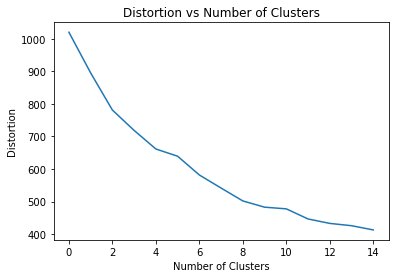

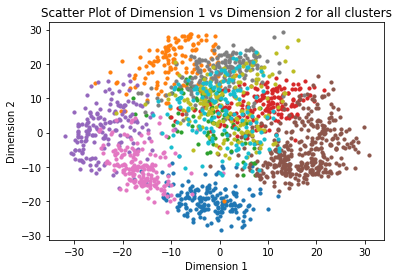

In [5]:
# Cell type : CodeWrite
# Write the code for dimensionality reduction, run k-means algorithm on the reduced data-set and do plotting.

# Calculating the distortions for the elbow method to determine optimal k
distortions = []
for k in range(1, 16):
    mean_vectors, R = Kmeans(Z16.T, k)
    distortion = 0
    for i in range(R.shape[0]):
        r = R[i]
        cluster = np.argmax(r)
        x = Z16[:, i]
        distortion += np.linalg.norm(x-mean_vectors[:,cluster])**2
    distortions.append(distortion/R.shape[0])
    print(f'Distortion for k={k} calculated.')

# Plotting the distortions
plt.plot(distortions)
plt.xlabel(r'Number of Clusters')
plt.ylabel(r'Distortion')
plt.title(r'Distortion vs Number of Clusters')
plt.show()

# Seperating the dataset into clusters
mean_vectors, R = Kmeans(Z8.T, 10)
clusters = []
for i in range(10):
    cluster = Z16[:, np.where(R[:, i]==1)[0]]
    clusters.append(cluster)

# Plotting the first 2 dimensions of each cluster
for cluster in clusters:
    plt.scatter(cluster[0], cluster[1], s = 10)
plt.xlabel(r'Dimension 1')
plt.ylabel(r'Dimension 2')
plt.title(r'Scatter Plot of Dimension 1 vs Dimension 2 for all clusters')
plt.show()

####5d) In the next TextWrite cell, Summarise and explain your observations from the above experiments. Is the PCA+K-means clustering consistent with how your brain would cluster the images?



**Cell type : TextWrite**

Report your observations, MSE values and the method used to choose the optimal number of clusters.

## Observations
* In part (a) of this problem, we plotted the Cumulative Percentage Variance explained by each of the principal components. We obtained a monotonically increasing, concave curve which tends to saturate for higher number of principal components. The curve increases because we are plotting a cumulative value which is always non-negative (variance).
* The curve was concave and tended to saturate for higher number of principal components because the principal components corresponding to the larger eigenvalues would contribute to higher variance as is consistent with the theory of PCA.
* In part (b), we calculated the Mean Squared Error between the actual datapoints and the reconstructed datapoints. The MSE value for a dimension $d$ should be the sum of the $d-m$ smallest eigenvalues of the covariance matrix. The MSE values obtained are in accordance to the above fact.
* We concluded from the MSE values that $\widehat{d}=16$ was the optimal $\widehat{d}$ because it gave the least MSE value and the MSE value was significantly lower than for $\widehat{d}=8$.
* Next, we applied K-means to the dataset and we obtained the optimal number of clusters by using the Elbow Method. In this method, the average squared distance between the datapoints to the respective cluster centers. Using this, the optimal number of clusters obtained was 10 and this goes well with our intuition because we are dealing with a dataset which has images of 10 different digits.
* From the Scatter Plot it is clear that the clustering is consistent with how our brains would cluster the datapoints as we can notice distinct clusters with different colours. Although there is some overlap between the clusters, this overlap can be explained by considering the fact that we plotted only the first two dimensions and the clustering was done on the basis of 14 other dimensions.

## MSE Values
* The MSE value considering 2 dimensions is 858.94
* The MSE value considering 4 dimensions is 616.19
* The MSE value considering 8 dimensions is 391.79
* The MSE value considering 16 dimensions is 180.94

## Method to Choose Optimal Number of Clusters
* To find the optimal number of clusters k, we used the **Elbow Method**. In this method we find the sum of average distances between the datapoints in each cluster to the cluster centers, called the distortion. When we plot this for different k, we notice that the distortion reduces for increasing k but after a particular k, it almost saturates. This is the optimal k.
* This method works because for any k less than the optimal k, there would be clusters which are actually distinct/separable but they are taken as one cluster because of the smaller number of clusters. For such a cluster, the average distance between any two points would be high, which can be reduced by taking a larger number of clusters. When we take a k which is  greater than the optimal k, there would be clusters which are actually the same cluster but are separated because of the high value of k. This would not cause the distortion to change significantly from the value obtained for the optimal k because calculating the distortion for the two clusters separately would be equivalent to calculating it together as the inter cluster distance is small.